___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Случайные леса (Random Forest) - Классификация

## Данные

Мы будем использовать один и тот же набор данных для всех методов классификации на основе деревьев (Деревья решений - Decision Tree, Случайные леса - Random Forests и Расширяемые деревья - Gradient Boosted Trees). Это позволит нам сравнивать работу этих методов между собой.

Мы будем работать с набором данных "Palmer Penguins" - он достаточно простой для того, чтобы мы могли понять влияние гиперпараметров на результаты классификации.

<img src="penguin.jpg" style="max-width:400px">

Данные были собраны и предоставлены Кристиной Горман и антарктической станцией Палмер, расположенной на острове Анверс, к северу от Южного полярного круга.  

Более подробно см. следующую работу на английском языке: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081


* penguins_size.csv: Упрощённые данные из исходного набора данных о пингвинах. Содержит следующие переменные:

    * species: разновидности пингвинов - Антарктический пингвин (Chinstrap), Пингвин Адели (Adélie) или Папуанский пингвин (Gentoo)
    * culmen_length_mm: длина клюва (mm)
    * culmen_depth_mm: высота клюва (mm)
    * flipper_length_mm: длина крыла (mm)
    * body_mass_g: масса тела (g)
    * island: название острова (Dream, Torgersen или Biscoe) на архипелаге Палмер (Антарктика)
    * sex: пол пингвина

**Наша цель - создать модель, которая поможет нам определять вид пингвина на основе его физических атрибутов, чтобы исследователи могли с помощью этой модели классифицировать пингвинов, без необходимости привлечения опытного биолога.**

## Imports

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [79]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [87]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Случайные леса для классификации - Random Forest Classification

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [98]:
# Используем 10 случайных деревьев
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [99]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [100]:
preds = model.predict(X_test)

## Оценка работы модели

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [102]:
confusion_matrix(y_test,preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

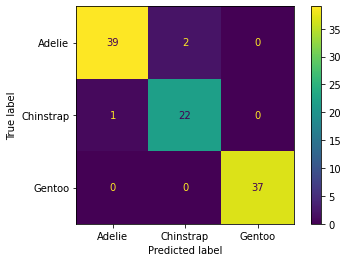

In [103]:
plot_confusion_matrix(model,X_test,y_test)

## Важность признаков

Очень полезный атрибут обученной модели!

In [52]:
model.feature_importances_

array([0.35324545, 0.13320651, 0.1985798 , 0.12074795, 0.14244127,
       0.03781403, 0.00677831, 0.00718669])

## Выбираем правильное количество деревьев

Давайте исследуем, приведёт ли добавление дополнительных деревьев к улучшению производительности...

In [53]:
test_error = []

for n in range(1,40):
    # Используем n случайных деревьев
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

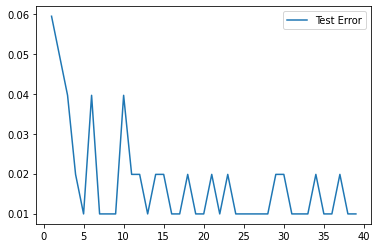

In [54]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Здесь ясно видно, что мы получаем всё меньше пользы при добавлении дополнительных деревьев. Для такого маленького набора данных, мы по сути уже извлекли всю нужную информацию с помощью примерно 5 деревьев.

# Случайные леса - исследование гиперпараметров

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [55]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [56]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


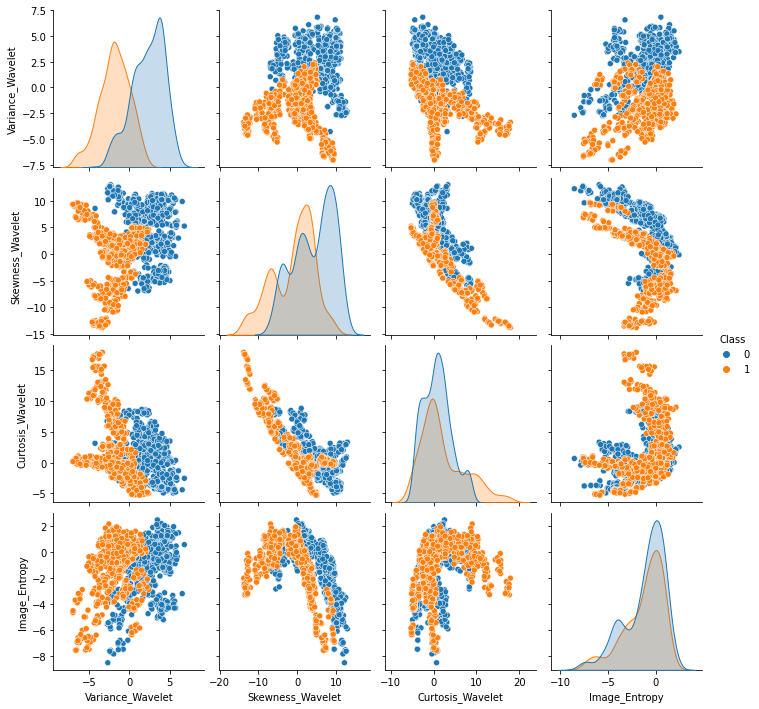

In [57]:
sns.pairplot(df,hue='Class')

In [58]:
X = df.drop("Class",axis=1)

In [59]:
y = df["Class"]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [64]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # oob_score имеет смысл только при bootstrap=True!

In [65]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [66]:
grid.fit(X_train,y_train)

c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\marcial\anaconda_new\envs\ml_master\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [67]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [68]:
predictions = grid.predict(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



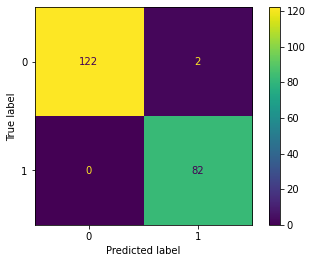

In [70]:
plot_confusion_matrix(grid,X_test,y_test)

In [71]:
# Без нижнего подчёркивания в конце - получаем исходный параметр oob_score
grid.best_estimator_.oob_score

True

In [72]:
# С нижним подчёркиванием в конце - получаем значение метрики oob_score, вычисленное при обучении модели
grid.best_estimator_.oob_score_

0.9939965694682675

## Количество деревьев -  Number of Estimators (Trees)

Давайте нарисуем график зависимости ошибки от количества деревьев (Error vs. Number of Estimators).

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # Более подробно об этой строке кода см. в видео-лекции!!
    errors.append(err)
    misclassifications.append(n_missed)

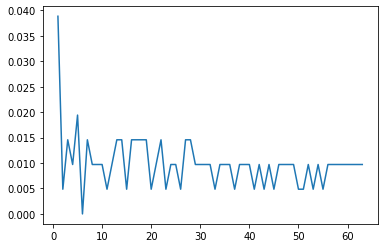

In [75]:
plt.plot(range(1,64),errors)

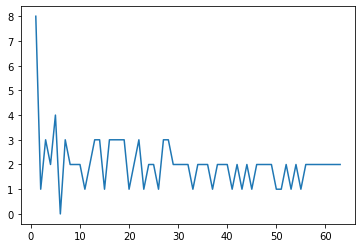

In [76]:
plt.plot(range(1,64),misclassifications)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df = df.dropna()

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [7]:
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if

In [12]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [13]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [14]:
preds = rfc.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

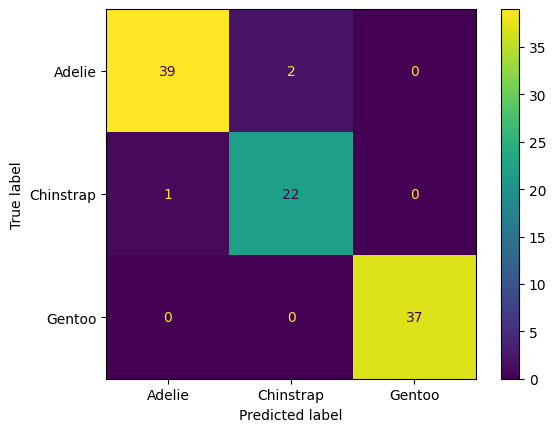

In [16]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [19]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [20]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<Axes: xlabel='Class', ylabel='count'>

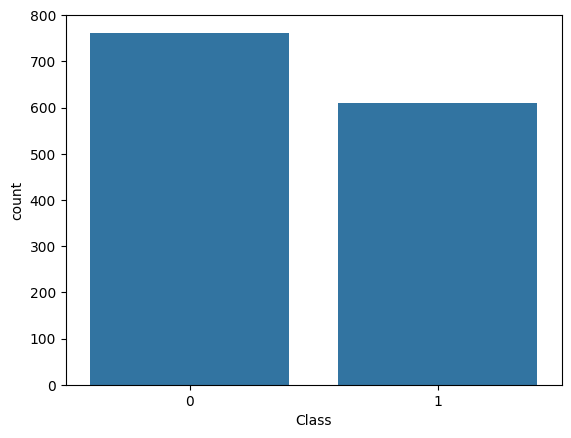

In [23]:
sns.countplot(data=df, x='Class')

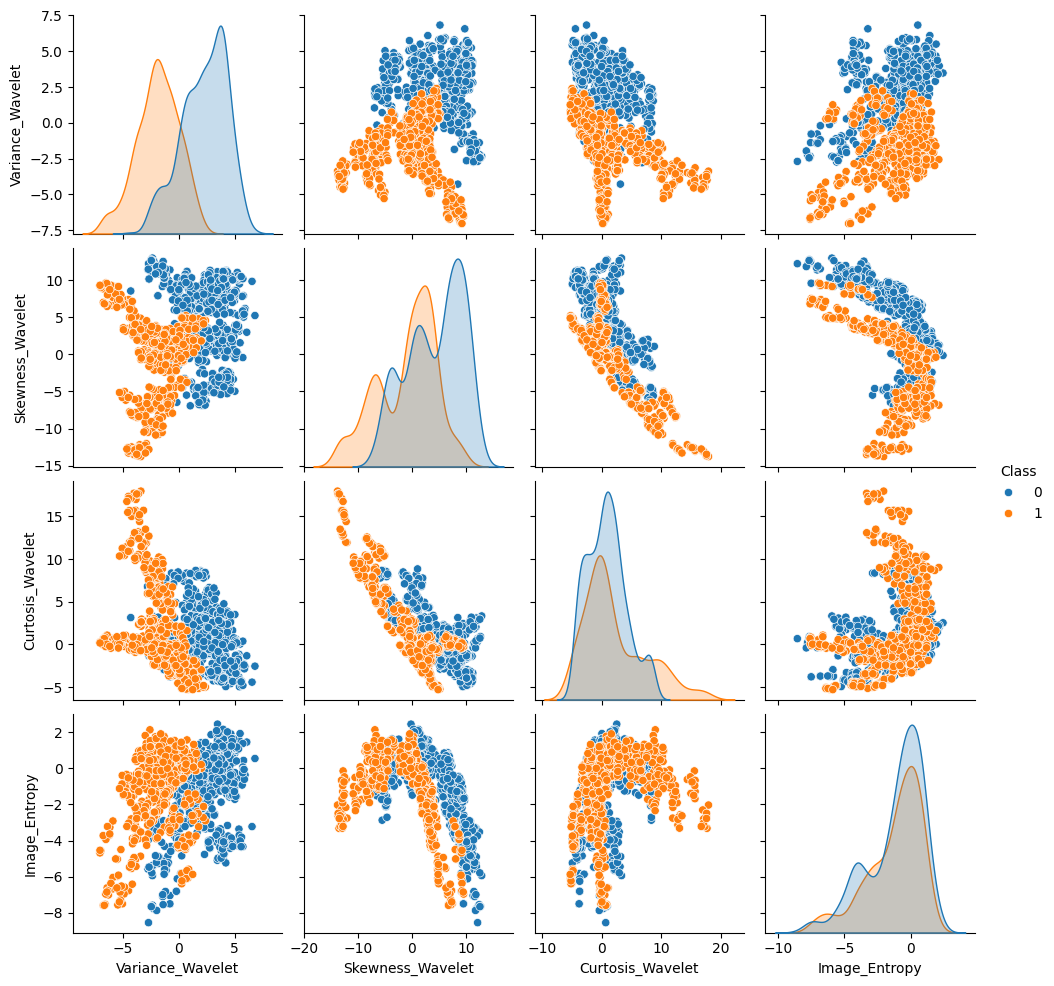

In [26]:
sns.pairplot(df, hue='Class')

In [27]:
X = df.drop('Class', axis=1)

In [28]:
y = df['Class']

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#help(RandomForestClassifier)

In [67]:
n_estimators = [64, 100, 128, 200]

In [68]:
max_features = [2, 3, 4]

In [94]:
bootstrap = [True, False]

In [95]:
oob_score= [True, False]

In [96]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [97]:
rfc = RandomForestClassifier()

In [98]:
grid = GridSearchCV(rfc, param_grid)

In [99]:
grid.fit(X_train, y_train)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    raise ValueError

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [100]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [101]:
grid.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [107]:
rfc = RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [108]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=64, oob_score=True)

In [109]:
rfc.oob_score_

0.9939965694682675

In [110]:
rfc.oob_score

True

In [111]:
predictions = rfc.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [113]:
accuracy_score(y_test, predictions)

0.9902912621359223

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



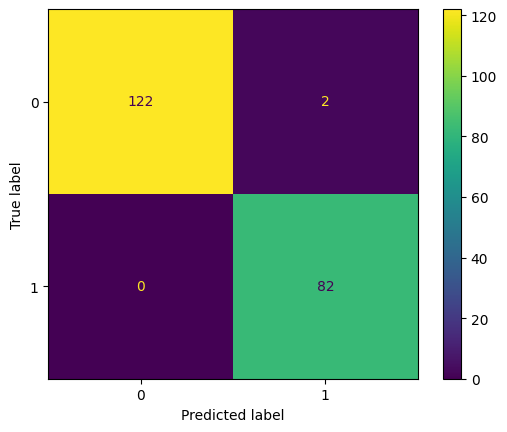

In [116]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [124]:
y_test != predictions

194     False
622     False
1063    False
390     False
327     False
        ...  
897     False
354     False
1057    False
869     False
352     False
Name: Class, Length: 206, dtype: bool

In [126]:
errors = []
misclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)

    error = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)    

    errors.append(error)
    misclassifications.append(n_missed)

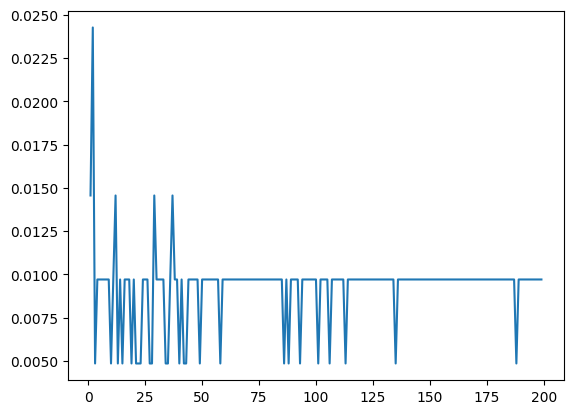

In [127]:
plt.plot(range(1, 200), errors)

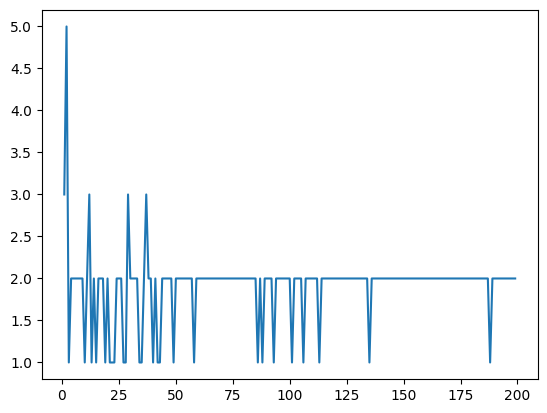

In [128]:
plt.plot(range(1, 200), misclassifications)